# Analyse camera tracking data

### created by Chagas, Andre M 
### Distributed under CC BY SA 4.0 20200310

In [1]:
#import necessary libraries
import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the file path 

filepath = "/mnt/d/repositories/rodent-tracking/test_data/all_data.csv"

#filepath = "~/repositories/sussex_neuro/rodent-tracking/test_data/all_data_olenna2020-02-24T18_07_54.csv"
fid = pd.read_csv(filepath)

# rename columns so it is easier to call them 
# there is probably a better way of setting their names in Bonsai...

for key in fid.keys():
    
    secondDot = key.find(".",6)
    fid = fid.rename(columns = {key:key[secondDot+1:]})
    print(key[secondDot+1:])


wheelmoving
wheel.Item1.wheelROI.X
wheel.Item1.wheelROI.Y
wheel.Item1.wheelROI.Width
wheel.Item1.wheelROI.Height
wheel.Item2.wheel.Centroid.X
wheel.Item2.wheel.Centroid.Y
wheel.Item2.wheel.Orientation
wheel.Item2.wheel.MajorAxisLength
wheel.Item2.wheel.MinorAxisLength
wheel.Item2.wheel.Area
mousemoving
mouse.Item1.mouse.Centroid.X
mouse.Item1.mouse.Centroid.Y
mouse.Item1.mouse.Orientation
mouse.Item1.mouse.MajorAxisLength
mouse.Item1.mouse.MinorAxisLength
mouse.Item1.mouse.Area
mouse.Item2.mouseROI.X
mouse.Item2.mouseROI.Y
mouse.Item2.mouseROI.Width
mouse.Item2.mouseROI.Height
frameinterval
timestamp


**travelled distance**


if there was only the mouse on the cage, the travelled distance would be: 
- given by pytagoras a2 = b2 X c2 for where b and c are x and y
dimensions, and their magnitude is the difference between 2 consecutive frames.

But the mouse has a wheel in its cage, so we need to add the "distance" the wheel
travelled to the distance travelled by the animal (since while running on the wheel,
the animal is static in relation to the cage and camera).

so in the end we want the distance travelled by the mouse while it was NOT on 
the wheel, plus the distance travelled by the wheel, while the wheel was moving


In [3]:
### mouse distance X when wheel was NOT moving
#get boolean array for when mouse is moving, but wheel is not:
fid  = fid.join(pd.Series(data = (fid["mousemoving"] & ~fid["wheelmoving"]),name="onlymouse"))
print(fid["onlymouse"])

0       False
1       False
2        True
3       False
4       False
        ...  
7583    False
7584    False
7585    False
7586    False
7587    False
Name: onlymouse, Length: 7588, dtype: bool


In [4]:
### mouse distance X 
mouseXdist = fid["mouse.Item1.mouse.Centroid.X"].diff()
### mouse distance Y 
mouseYdist = fid["mouse.Item1.mouse.Centroid.Y"].diff()



In [5]:
# total distance using pytagoras, and excluding the times when the mouse was on the wheel
mouseTotalDist = np.sqrt(mouseXdist[fid["onlymouse"]]**2+mouseYdist[fid["onlymouse"]]**2) 
print (mouseTotalDist.sum())

6954.4175381726645


#### Moving time

Get the total moving time, wheel plus non-wheel


In [6]:
totalTime = fid["frameinterval"]
movingTime = totalTime[fid["onlymouse"]].sum() + totalTime[fid["wheelmoving"]].sum()

print("recording time: " + str(totalTime.sum())+ " seconds")
print("total moving time: " + str(movingTime) + " seconds")
print("wheel moving time: "+ str(totalTime[fid["wheelmoving"]].sum())+ str())

recording time: 240.78456319999532 seconds
total moving time: 122.23342079999566 seconds
wheel moving time: 117.34827520000545


In [26]:
fid["frameinterval"]

0       0.000000
1       0.017254
2       0.047232
3       0.031923
4       0.051034
          ...   
7583    0.034701
7584    0.038080
7585    0.041229
7586    0.031757
7587    0.040192
Name: frameinterval, Length: 7588, dtype: float64

**calculate distance travelled while on the wheel**

The wheel has a black marker that is used to track its movement. the tracker is set close to the center of the wheel and the readings we have to work with are X and Y positions of this tracker in relation to the bottom left corner of the WheelROI (the next cell plots the raw data for better visualisation)

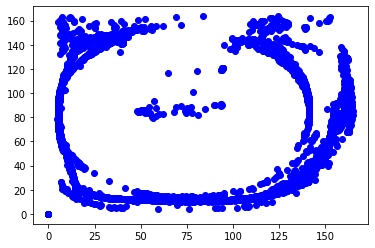

In [6]:
plt.plot(fid["wheel.Item2.wheel.Centroid.X"],fid["wheel.Item2.wheel.Centroid.Y"],'bo')

the above graph shows all detected X against Y positions of the wheel marker. Gap on the top can happen because of a glare from the IR light from the camera leds.

In [16]:
# get the x and y average positions are remove them from each dimension, so to "center" the wheel
wheelXavg = fid["wheel.Item2.wheel.Centroid.X"].mean()
wheelYavg = fid["wheel.Item2.wheel.Centroid.Y"].mean()

#fid  = fid.join(pd.Series(data = (fid["wheel.Item2.wheel.Centroid.X"]-wheelXavg),name="wheelXcentered")
fid = fid.join(pd.Series(data = (fid["wheel.Item2.wheel.Centroid.X"]-wheelXavg),name="wheelXcentered"))
fid = fid.join(pd.Series(data = (fid["wheel.Item2.wheel.Centroid.Y"]-wheelYavg),name="wheelYcentered"))
#print(fid["onlymouse"])

plt.plot(fid["wheelXcentered"],fid["wheelYcentered"],"bo")

ValueError: columns overlap but no suffix specified: Index(['wheelXcentered'], dtype='object')

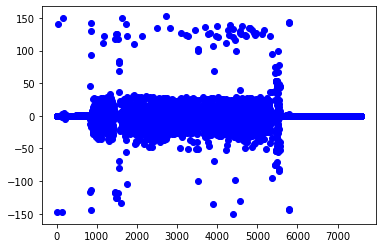

In [20]:
plt.plot(fid["wheelXcentered"].diff(),"bo")

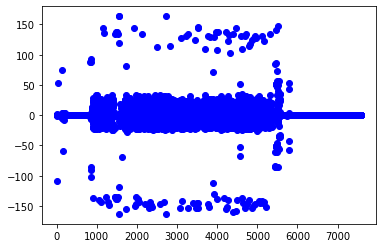

In [21]:
plt.plot(fid["wheelYcentered"].diff(),"bo")